<a href="https://colab.research.google.com/github/NateshReddy/Denoising-Algorithm-Implementation-/blob/master/cifar10_win.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import keras
from keras.models import load_model
from keras.datasets import cifar10
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
from keras import layers
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [13]:
batch_size = 32
num_classes = 10
epochs = 30
saveDir = "/content/drive/My Drive/denoising task/model3_win"

In [3]:
(train_data_clean, _), (test_data_clean, _) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [4]:
train_data_clean = train_data_clean.astype('float32') / 255.
test_data_clean = test_data_clean.astype('float32') / 255.

In [5]:
def add_noise_and_clip_data(data):
   noise = np.random.normal(loc=0.0, scale=0.1, size=data.shape)
   data = data + noise
   data = np.clip(data, 0., 1.)
   return data
train_data_noisy = add_noise_and_clip_data(train_data_clean)
test_data_noisy = add_noise_and_clip_data(test_data_clean)

In [6]:
def showOrigDec(orig, noise, num=10):
    import matplotlib.pyplot as plt
    n = num
    plt.figure(figsize=(20, 4))

    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i+1)
        plt.imshow(orig[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        # display noisy
        ax = plt.subplot(2, n, i +1 + n)
        plt.imshow(noise[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
    plt.figtext(0.5,0.95, "ORIGINAL IMAGES", ha="center", va="top", fontsize=14, color="g")
    plt.figtext(0.5,0.5, "NOISY IMAGES", ha="center", va="top", fontsize=14, color="g")
    plt.subplots_adjust(hspace = 0.3 )
    plt.show()

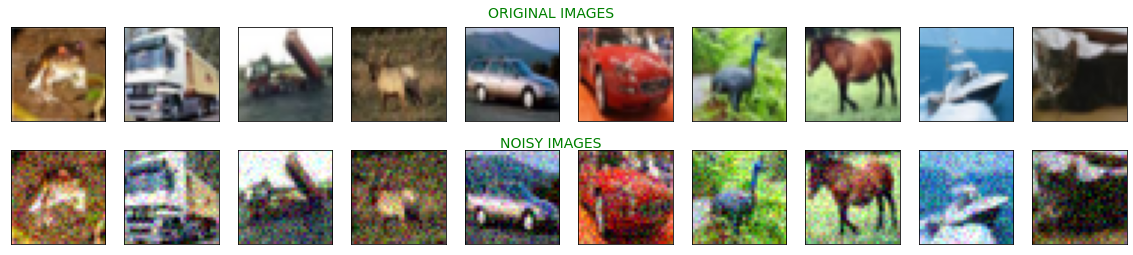

In [7]:
showOrigDec(train_data_clean, train_data_noisy)

In [10]:
input_img = Input(shape=(32, 32, 3))
x = Conv2D(64, (7, 7), padding='same')(input_img)
x = BatchNormalization()(x)
x = Activation('relu')(x)
    
for i in range(3):
    x = Conv2D(64, (7, 7), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
x = Conv2D(3, (7, 7), padding='same')(x)
x = BatchNormalization()(x)
output_img = layers.add([x, input_img])

In [11]:
model = Model(input_img, output_img)
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
es_cb = EarlyStopping(monitor='val_loss', patience=2, verbose=1, mode='auto')
chkpt = saveDir + 'AutoEncoder_Cifar10_win5rb_weights.{epoch:02d}-{loss:.2f}-{val_loss:.2f}.hdf5'
cp_cb = ModelCheckpoint(filepath = chkpt, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

In [15]:
history = model.fit(train_data_noisy, train_data_clean,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(test_data_noisy, test_data_clean),
                    callbacks=[es_cb, cp_cb],
                    shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 129s 3ms/step - loss: 0.2013 - val_loss: 0.0047

Epoch 00001: val_loss improved from inf to 0.00474, saving model to /content/drive/My Drive/denoising task/model3_winAutoEncoder_Cifar10_win5rb_weights.01-0.20-0.00.hdf5
Epoch 2/30
50000/50000 [==============================] - 121s 2ms/step - loss: 0.0018 - val_loss: 0.0016

Epoch 00002: val_loss improved from 0.00474 to 0.00156, saving model to /content/drive/My Drive/denoising task/model3_winAutoEncoder_Cifar10_win5rb_weights.02-0.00-0.00.hdf5
Epoch 3/30
50000/50000 [==============================] - 121s 2ms/step - loss: 0.0015 - val_loss: 0.0015

Epoch 00003: val_loss improved from 0.00156 to 0.00155, saving model to /content/drive/My Drive/denoising task/model3_winAutoEncoder_Cifar10_win5rb_weights.03-0.00-0.00.hdf5
Epoch 4/30
50000/50000 [==============================] - 121s 2ms/step - loss: 0.0014 - val_loss: 0.0015

Epoc

In [17]:
dae = load_model('/content/drive/My Drive/denoising task/model3_win/model3_winAutoEncoder_Cifar10_win5rb_weights.07-0.00-0.00.hdf5')

In [18]:
test_data_denoised = dae.predict(test_data_noisy)

In [19]:
score = dae.evaluate(test_data_noisy, test_data_clean, verbose=1)
print(score)

10000/10000 [==============================] - 7s 684us/step
0.0014279761385172605


In [20]:
# definition to show original image and reconstructed image
def showOrigDec(orig, noise, denoise, num=10):
    import matplotlib.pyplot as plt
    n = num
    plt.figure(figsize=(20, 6))

    for i in range(n):
        # display original
        ax = plt.subplot(3, n, i+1)
        plt.imshow(orig[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display noisy image
        ax = plt.subplot(3, n, i +1 + n)
        plt.imshow(noise[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        # display denoised image
        ax = plt.subplot(3, n, i +1 + n + n)
        plt.imshow(denoise[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
    plt.figtext(0.5,0.95, "ORIGINAL IMAGES", ha="center", va="top", fontsize=14, color="g")
    plt.figtext(0.5,0.65, "NOISY IMAGES", ha="center", va="top", fontsize=14, color="g")
    plt.figtext(0.5,0.35, " DENOISED RECONSTRUCTED IMAGES", ha="center", va="top", fontsize=14, color="g")
    plt.subplots_adjust(hspace = 0.5 )
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


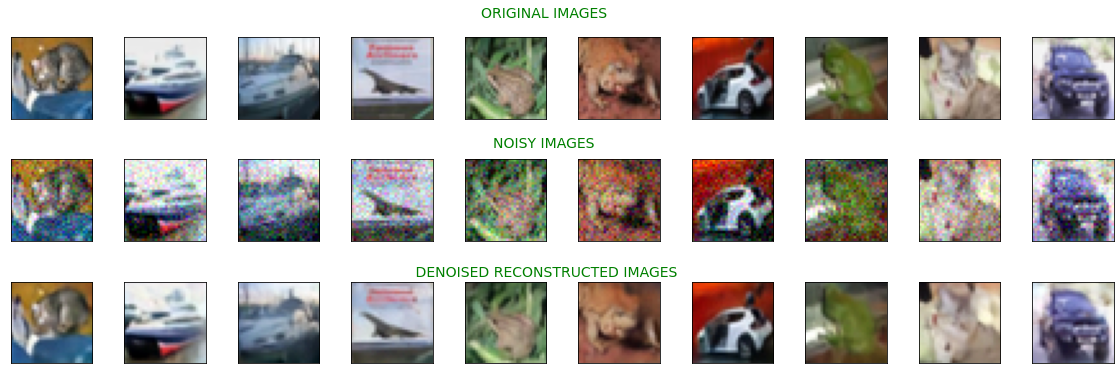

In [21]:
showOrigDec(test_data_clean, test_data_noisy, test_data_denoised)

In [22]:
def mse(data_1, data_2):
   return np.square(np.subtract(data_1, data_2)).mean()

noisy_clean_mse = mse(test_data_clean, test_data_noisy)
denoised_clean_mse = mse(test_data_denoised, test_data_clean)

noisy_clean_mse, denoised_clean_mse

(0.009306011107191413, 0.001427976)

In [23]:
from skimage import metrics
avg_psnr = metrics.peak_signal_noise_ratio(test_data_clean,test_data_denoised)
avg_psnr

28.45279048613151

In [24]:
avg_ssim = metrics.structural_similarity(test_data_clean,test_data_denoised,multichannel=True)
avg_ssim

0.9849170308143346